<a href="https://colab.research.google.com/github/syoh5188/groupStudy/blob/main/SanFranciscoCrimeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# San Francisco Crime Classification


## 04-03-01. 데이터전처리 실습
https://wikidocs.net/86299

###대회 설명

URL: https://www.kaggle.com/c/sf-crime (대회바로가기)

설명

1934년부터 1963년까지 샌프란시스코의 알카트라즈섬에 악명 높은 범죄자들을 수용 한 것으로 유명했습니다. 이 대회는 약 12년 동안 샌프란시스코의 모든 지역에서 발생한 범죄 보고서를 제공합니다. 시간과 장소가 주어지면 발생한 범죄의 유형(카테고리)을 예측하여 제출합니다.


평가방법

범죄 유형별 범죄 발생 가능성을 확률로 계산하여 제출하면, multi class logarithmic loss를 사용하여 정확도를 측정합니다.

### 데이터

본 대회는 샌프란시스코 오픈 데이터 SF OpenData에서 제공하는 범죄관련 데이터를 사용합니다.

* 2003년 1월 1일 ~ 2015년 5월 13일 범죄데이터
* Training Set: 1,3,5,7 주
* Test Set: 2,4,6,8 주


* Dates - 범죄 사건 발생 날짜 및 시간 정보
* Category - 범죄 사건 카테고리(이 값이 예측할 목표변수)
* Descript - 범죄 사건에 대한 자세한 설명
* DayOfWeek - 요일
* PdDistrict - 경찰서 구역 이름
* Resolution - 범죄 사건이 해결 된 방법
* Address - 범죄 사건의 대략적인 주소
* X - 경도
* Y - 위도

In [ ]:
# 필요모듈 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 04-03-01. 데이터전처리 실습
https://wikidocs.net/86627

### 데이터 훑어보기

#### 01. csv 파일을 데이터프레임으로 읽기

In [ ]:
san = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/san_train.csv')
san

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


#### 02. 학습 데이터 셋의 상위 5개 항목 출력

In [ ]:
san.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


#### 03. 학습 데이터 셋의 각 필드 데이터 분포(평균, 최소값, 최대값 등)를 살펴보기

In [ ]:
san.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


#### 04. 각 컬럼의 데이터 타입 확인하기

In [ ]:
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


#### 05. 범죄의 범주 'Category'는 어떤 값이 있는지 확인하기

In [ ]:
san.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

### 데이터 전처리

#### 06. Dates 필드의 데이터타입을 'datetime64' 타입으로 변경하기


In [ ]:
san.Dates = san.Dates.astype('datetime64')
san.info() #  0   Dates       878049 non-null  datetime64[ns] -> checked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB



#### 07. 연, 월, 일, 요일, 시, 분값을 새로운 컬럼(year, month, day, dayofweek, hour, minute)을 생성해서 할당하기

In [ ]:
san['year'] = san.Dates.dt.year
san['month'] = san.Dates.dt.month
san['day'] = san.Dates.dt.day
san['dayofweek'] = san.Dates.dt.dayofweek
san['hour'] = san.Dates.dt.hour
san['minute'] = san.Dates.dt.minute
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   year        878049 non-null  int64         
 10  month       878049 non-null  int64         
 11  day         878049 non-null  int64         
 12  dayofweek   878049 non-null  int64         
 13  hour        878049 non-null  int64         
 14  minute      878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(

#### 08. 범죄가 발생한 경도, 위도 값을 나타내는 X, Y 컬럼의 값을 더한 값을 담은 'X+Y' 컬럼, X, Y의 차이 값을 담은 'X-Y' 컬럼을 생성하기


In [ ]:
san['X+Y'] = san['X'] + san['Y']
san['X-Y'] = san['X'] - san['Y']
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   year        878049 non-null  int64         
 10  month       878049 non-null  int64         
 11  day         878049 non-null  int64         
 12  dayofweek   878049 non-null  int64         
 13  hour        878049 non-null  int64         
 14  minute      878049 non-null  int64         
 15  X+Y         878049 non-null  float64       
 16  X-

#### 09. n_days라는 컬럼을 생성하고, 일별 d-day를 계산하여 입력하기
예: 범죄 첫발생일: 0, 다음 발생일: 1

In [ ]:
san['n_days'] = (san['Dates'].dt.date - san['Dates'].dt.date.min()).apply(lambda x: x.days)
san['n_days']

0         4510
1         4510
2         4510
3         4510
4         4510
          ... 
878044       0
878045       0
878046       0
878047       0
878048       0
Name: n_days, Length: 878049, dtype: int64

#### 10. 변수 y를 선언해서 학습할 목표변수(=종속변수)인 Category 필드값을 담기

In [ ]:
y = san['Category']
y

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
                   ...          
878044                   ROBBERY
878045             LARCENY/THEFT
878046             LARCENY/THEFT
878047                 VANDALISM
878048    FORGERY/COUNTERFEITING
Name: Category, Length: 878049, dtype: object

#### 11. 연도별(year) 범죄 발생 횟수를 알아보기
[힌트]
* value_counts를 사용하는 방법
* groupby를 사용하는 방법

In [ ]:
san.groupby(by='year').count()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
year,,,,,,,,,,,,,,,,,
2003,73902,73902,73902,73902,73902,73902,73902,73902,73902,73902,73902,73902,73902,73902,73902,73902,73902
2004,73422,73422,73422,73422,73422,73422,73422,73422,73422,73422,73422,73422,73422,73422,73422,73422,73422
2005,70779,70779,70779,70779,70779,70779,70779,70779,70779,70779,70779,70779,70779,70779,70779,70779,70779
2006,69909,69909,69909,69909,69909,69909,69909,69909,69909,69909,69909,69909,69909,69909,69909,69909,69909
2007,68015,68015,68015,68015,68015,68015,68015,68015,68015,68015,68015,68015,68015,68015,68015,68015,68015
2008,70174,70174,70174,70174,70174,70174,70174,70174,70174,70174,70174,70174,70174,70174,70174,70174,70174
2009,69000,69000,69000,69000,69000,69000,69000,69000,69000,69000,69000,69000,69000,69000,69000,69000,69000
2010,66542,66542,66542,66542,66542,66542,66542,66542,66542,66542,66542,66542,66542,66542,66542,66542,66542
2011,66619,66619,66619,66619,66619,66619,66619,66619,66619,66619,66619,66619,66619,66619,66619,66619,66619


In [ ]:
san.value_counts(san['year']).sort_index()

year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
dtype: int64

#### 12. 월별(month) 범죄 발생 횟수를 알아보기

In [ ]:
san.groupby('month').size()

month
1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
dtype: int64

#### 13. 요일별(DayOfWeek) 범죄 발생 횟수를 알아보기

In [ ]:
pd.value_counts(san['DayOfWeek'])

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [ ]:
san.value_counts(san['DayOfWeek'], ascending = True)

DayOfWeek
Sunday       116707
Monday       121584
Tuesday      124965
Thursday     125038
Saturday     126810
Wednesday    129211
Friday       133734
dtype: int64

#### 14. 카테고리별(Category) 범죄 발생 횟수를 알아보기

In [ ]:
san.value_counts(san['Category'], ascending = True)

Category
TREA                                6
PORNOGRAPHY/OBSCENE MAT            22
GAMBLING                          146
SEX OFFENSES NON FORCIBLE         148
EXTORTION                         256
BRIBERY                           289
BAD CHECKS                        406
FAMILY OFFENSES                   491
SUICIDE                           508
EMBEZZLEMENT                     1166
LOITERING                        1225
ARSON                            1513
LIQUOR LAWS                      1903
RUNAWAY                          1946
DRIVING UNDER THE INFLUENCE      2268
KIDNAPPING                       2341
RECOVERED VEHICLE                3138
DRUNKENNESS                      4280
DISORDERLY CONDUCT               4320
SEX OFFENSES FORCIBLE            4388
STOLEN PROPERTY                  4540
TRESPASS                         7326
PROSTITUTION                     7484
WEAPON LAWS                      8555
SECONDARY CODES                  9985
FORGERY/COUNTERFEITING          10609
FRA

#### 15. null값이 포함된 데이터 필드가 있는지 확인하기

In [ ]:
san.isnull().any().sum()

0

#### 16. 'Dates','Category','Descript','DayOfWeek','Resolution' 컬럼 삭제하기

In [ ]:
# san = san.drop(['Dates','Category','Descript','DayOfWeek','Resolution'], axis=1)

### 개인적 추가 및 공부

#### Python extract dates with lambda
from : https://www.w3resource.com/python-exercises/lambda/python-lambda-exercise-8.php

In [ ]:
import datetime
now = datetime.datetime.now()
print(now)
year = lambda x: x.year
month = lambda x: x.month
day = lambda x: x.day
t = lambda x: x.time()
print(year(now  ))
print(month(now))
print(day(now))
print(t(now))

2022-05-17 10:29:06.409347
2022
5
17
10:29:06.409347


In [ ]:
san['month'].value_counts()

10    80274
5     79644
4     78096
3     76320
1     73536
11    72975
9     71982
6     70892
2     70813
7     69971
8     68540
12    65006
Name: month, dtype: int64

## 04-03-02. 데이터시각화 실습
https://wikidocs.net/86881

#### 00. 필요 라이브러리 import

In [ ]:
import seaborn as sns  
import matplotlib.pylab as plt

#### 01. csv 파일을 데이터프레임으로 읽기

In [ ]:
san = pd.read_csv('/content/drive/MyDrive/스터디/group_offline6/san_train.csv')
san

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [ ]:
#### 06. Dates 필드의 데이터타입을 'datetime64' 타입으로 변경하기
san.Dates = san.Dates.astype('datetime64')
san.info() #  0   Dates       878049 non-null  datetime64[ns] -> checked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [ ]:
#### 07. 연, 월, 일, 요일, 시, 분값을 새로운 컬럼(year, month, day, dayofweek, hour, minute)을 생성해서 할당하기
san['year'] = san.Dates.dt.year
san['month'] = san.Dates.dt.month
san['day'] = san.Dates.dt.day
san['dayofweek'] = san.Dates.dt.dayofweek
san['hour'] = san.Dates.dt.hour
san['minute'] = san.Dates.dt.minute
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   year        878049 non-null  int64         
 10  month       878049 non-null  int64         
 11  day         878049 non-null  int64         
 12  dayofweek   878049 non-null  int64         
 13  hour        878049 non-null  int64         
 14  minute      878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(

In [ ]:
#### 08. 범죄가 발생한 경도, 위도 값을 나타내는 X, Y 컬럼의 값을 더한 값을 담은 'X+Y' 컬럼, X, Y의 차이 값을 담은 'X-Y' 컬럼을 생성하기
san['X+Y'] = san['X'] + san['Y']
san['X-Y'] = san['X'] - san['Y']
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   year        878049 non-null  int64         
 10  month       878049 non-null  int64         
 11  day         878049 non-null  int64         
 12  dayofweek   878049 non-null  int64         
 13  hour        878049 non-null  int64         
 14  minute      878049 non-null  int64         
 15  X+Y         878049 non-null  float64       
 16  X-

#### 01. 월별 범죄율 시각화하기

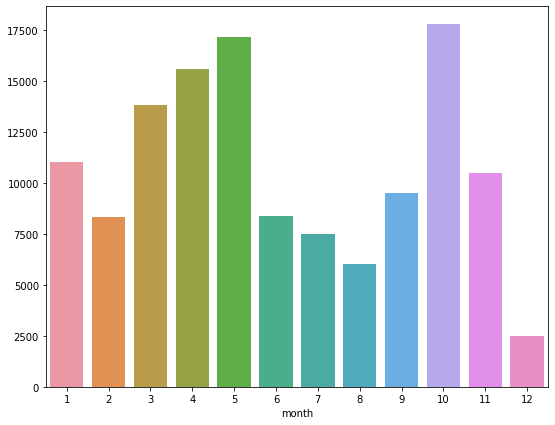

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(x=san.groupby('month').size().index, y=san.groupby('month').size().values -62500)
plt.show()

#### 02. 연도별 범죄 횟수 시각화

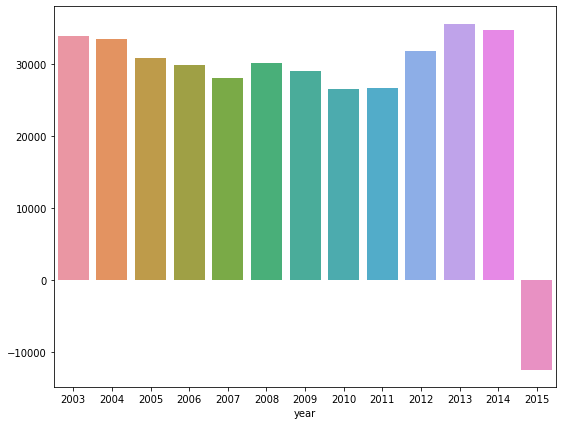

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(x=san.groupby('year').size().index, y=san.groupby('year').size().values -40000)

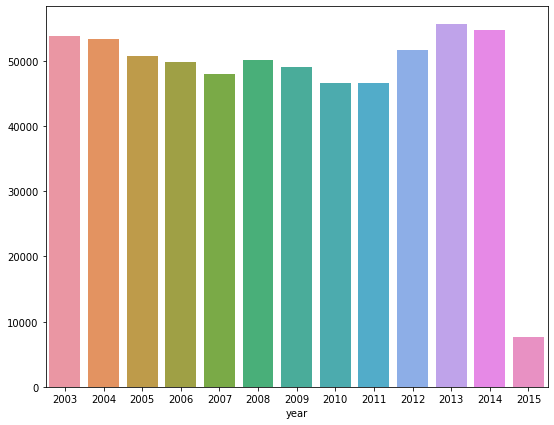

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(x=san.groupby('year').size().index, y=san.groupby('year').size().values -20000)

#### 03. 일별 범죄 횟수 시각화

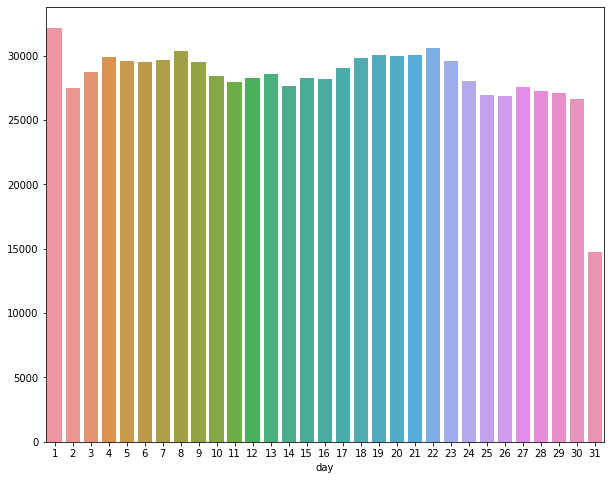

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=san.groupby(by='day').size().index, y=san.groupby(by='day').size().values)

#### 04. 요일별 범죄 횟수 시각화

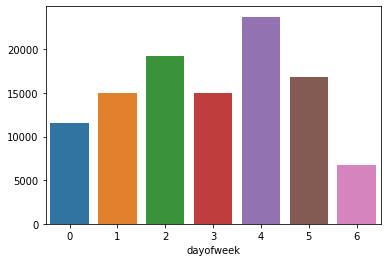

In [ ]:
sns.barplot(x=san.groupby('dayofweek').size().index, y=san.groupby('dayofweek').size().values - 110000)
plt.show()

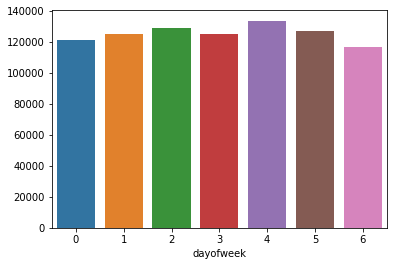

In [ ]:
sns.barplot(x=san.groupby('dayofweek').size().index, y=san.groupby('dayofweek').size().values)
plt.show()

#### 05. 카테고리별 범죄 횟수 시각화

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

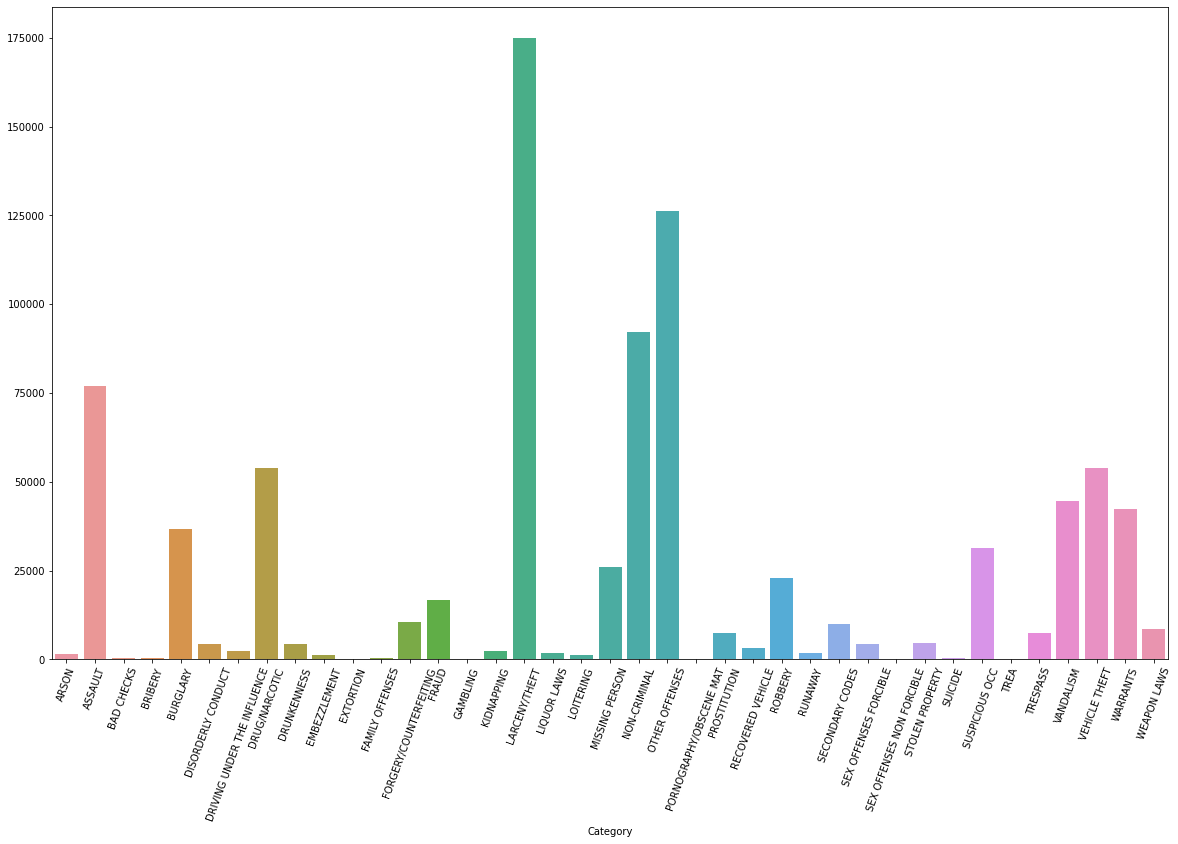

In [ ]:
plt.subplots(figsize = (20,12))
sns.barplot(x=san.groupby('Category').size().index, y=san.groupby('Category').size().values)
plt.xticks(rotation=70)

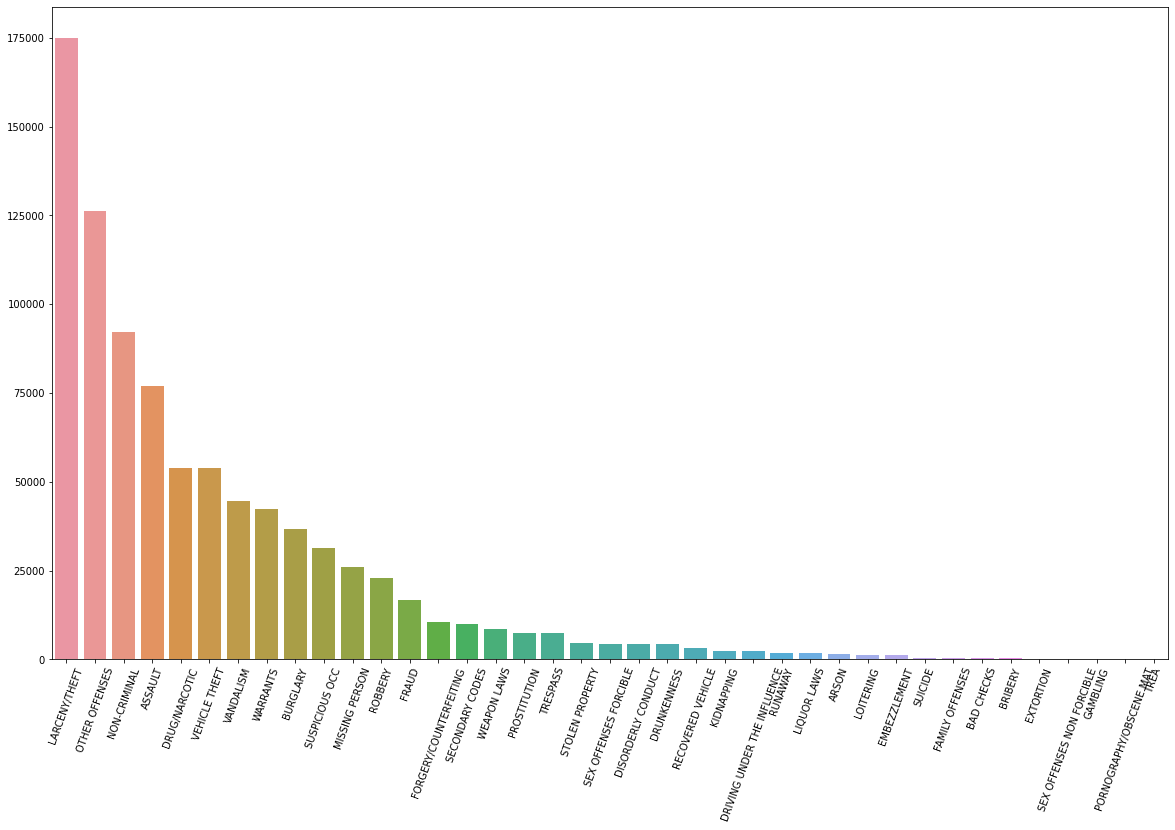

In [ ]:
plt.subplots(figsize = (20,12))
sns.barplot(x=san['Category'].sort_values().value_counts().index, y=san['Category'].sort_values().value_counts().values)
plt.xticks(rotation=70)
plt.show()

### 개인적 추가 및 공부

In [ ]:
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   year        878049 non-null  int64         
 10  month       878049 non-null  int64         
 11  day         878049 non-null  int64         
 12  dayofweek   878049 non-null  int64         
 13  hour        878049 non-null  int64         
 14  minute      878049 non-null  int64         
 15  X+Y         878049 non-null  float64       
 16  X-

#### 주소 관련 확인

In [ ]:
#import regular expresion
import re

In [ ]:
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   year        878049 non-null  int64         
 10  month       878049 non-null  int64         
 11  day         878049 non-null  int64         
 12  dayofweek   878049 non-null  int64         
 13  hour        878049 non-null  int64         
 14  minute      878049 non-null  int64         
 15  X+Y         878049 non-null  float64       
 16  X-

In [ ]:
# 6   Address     878049 non-null  object 
# crossed address 
crossAdd = san['Address'].str.contains(r'\/')
print(crossAdd.sum()) # 260818
# single address, include 'Block of'
singleAdd = san['Address'].str.contains(r'[B][l][o][c][k] [o][f]')
print(singleAdd.sum()) # 617231
print(617231 + 260818)

260818
617231
878049


#### 

#### 

#### 